In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.datasets

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']
print(np.shape(X), np.shape(Y))

(1797, 8, 8) (1797,)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

In [5]:
inputs = torch.autograd.Variable(torch.Tensor(x_train).float()).unsqueeze(1)
print(inputs.size())

torch.Size([898, 1, 8, 8])


In [6]:
feature_maps = torch.autograd.Variable(torch.Tensor(x_train).float()).unsqueeze(1)

print(feature_maps.size())

n = torch.nn.Conv2d(1,40, 1) # in-channels = 1, out-channels = 4, kernel=4
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.Conv2d(40,20, 1) # in-channels = 1, out-channels = 4, kernel=4
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.Conv2d(20,10, 1) # in-channels = 1, out-channels = 4, kernel=4
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.ConvTranspose2d(10,20, 1) # in-channels = 1, out-channels = 4, kernel=4
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.ConvTranspose2d(20,40, 1) # in-channels = 1, out-channels = 4, kernel=4
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.ConvTranspose2d(40,1, 1) # in-channels = 1, out-channels = 4, kernel=4
feature_maps = n(feature_maps)
print(feature_maps.size())

torch.Size([898, 1, 8, 8])
torch.Size([898, 40, 8, 8])
torch.Size([898, 20, 8, 8])
torch.Size([898, 10, 8, 8])
torch.Size([898, 20, 8, 8])
torch.Size([898, 40, 8, 8])
torch.Size([898, 1, 8, 8])


In [7]:
n_p_list = []  
loss_final = []
n_c = []

class Autoencoder(torch.nn.Module):
   
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 20, kernel_size=1),
            torch.nn.Conv2d(20,10,kernel_size=1),
            torch.nn.Conv2d(10,5,kernel_size=1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(5,10,kernel_size=1),
            torch.nn.ConvTranspose2d(10,20,kernel_size=1),
            torch.nn.ConvTranspose2d(20,1,kernel_size=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)




loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
loss_final.append(loss_list[99])

n_p = 0

for m in model.parameters():
    n_p += m.flatten().size()[0]
n_p_list.append(n_p)  

n_c.append(10*5)




    

In [8]:
class Autoencoder(torch.nn.Module):
   
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 40, kernel_size=1),
            torch.nn.Conv2d(40,20,kernel_size=1),
            torch.nn.Conv2d(20,10,kernel_size=1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(10,20,kernel_size=1),
            torch.nn.ConvTranspose2d(20,40,kernel_size=1),
            torch.nn.ConvTranspose2d(40,1,kernel_size=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)




loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
loss_final.append(loss_list[99])

n_p = 0

for m in model.parameters():
    n_p += m.flatten().size()[0]
n_p_list.append(n_p)  

n_c.append(10*20)


In [9]:
class Autoencoder(torch.nn.Module):
   
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 60, kernel_size=1),
            torch.nn.Conv2d(60,30,kernel_size=1),
            torch.nn.Conv2d(30,15,kernel_size=1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(15,30,kernel_size=1),
            torch.nn.ConvTranspose2d(30,60,kernel_size=1),
            torch.nn.ConvTranspose2d(60,1,kernel_size=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)




loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
loss_final.append(loss_list[99])

n_p = 0

for m in model.parameters():
    n_p += m.flatten().size()[0]
n_p_list.append(n_p)  


n_c.append(30*15)


In [10]:
class Autoencoder(torch.nn.Module):
   
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 80, kernel_size=1),
            torch.nn.Conv2d(80,40,kernel_size=1),
            torch.nn.Conv2d(40,20,kernel_size=1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(20,40,kernel_size=1),
            torch.nn.ConvTranspose2d(40,80,kernel_size=1),
            torch.nn.ConvTranspose2d(80,1,kernel_size=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)




loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
loss_final.append(loss_list[99])

n_p = 0

for m in model.parameters():
    n_p += m.flatten().size()[0]
n_p_list.append(n_p)  

n_c.append(20*40)


In [11]:
class Autoencoder(torch.nn.Module):
   
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 100, kernel_size=1),
            torch.nn.Conv2d(100,50,kernel_size=1),
            torch.nn.Conv2d(50,25,kernel_size=1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(25,50,kernel_size=1),
            torch.nn.ConvTranspose2d(50,100,kernel_size=1),
            torch.nn.ConvTranspose2d(100,1,kernel_size=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)




loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
loss_final.append(loss_list[99])

n_p = 0

for m in model.parameters():
    n_p += m.flatten().size()[0]
n_p_list.append(n_p) 

n_c.append(50*25)


In [12]:
class Autoencoder(torch.nn.Module):
   
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 120, kernel_size=1),
            torch.nn.Conv2d(120,60,kernel_size=1),
            torch.nn.Conv2d(60,30,kernel_size=1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(30,60,kernel_size=1),
            torch.nn.ConvTranspose2d(60,120,kernel_size=1),
            torch.nn.ConvTranspose2d(120,1,kernel_size=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)




loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
loss_final.append(loss_list[99])

n_p = 0

for m in model.parameters():
    n_p += m.flatten().size()[0]
n_p_list.append(n_p)  

n_c.append(60*30)


In [13]:
class Autoencoder(torch.nn.Module):
   
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 140, kernel_size=1),
            torch.nn.Conv2d(140,70,kernel_size=1),
            torch.nn.Conv2d(70,35,kernel_size=1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(35,70,kernel_size=1),
            torch.nn.ConvTranspose2d(70,140,kernel_size=1),
            torch.nn.ConvTranspose2d(140,1,kernel_size=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)




loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
loss_final.append(loss_list[99])

n_p = 0

for m in model.parameters():
    n_p += m.flatten().size()[0]
n_p_list.append(n_p) 


n_c.append(70*35)


In [14]:
class Autoencoder(torch.nn.Module):
   
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 160, kernel_size=1),
            torch.nn.Conv2d(160,80,kernel_size=1),
            torch.nn.Conv2d(80,40,kernel_size=1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(40,80,kernel_size=1),
            torch.nn.ConvTranspose2d(80,160,kernel_size=1),
            torch.nn.ConvTranspose2d(160,1,kernel_size=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)




loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
loss_final.append(loss_list[99])

n_p = 0

for m in model.parameters():
    n_p += m.flatten().size()[0]
n_p_list.append(n_p)

n_c.append(80*40)


In [17]:
n_p_list = np.array(n_p_list)
loss_final = np.array(loss_final)
n_c = np.array(n_c)

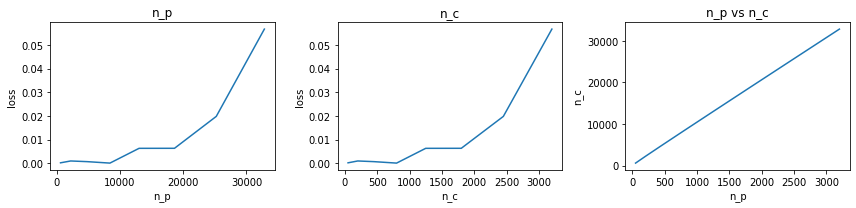

In [26]:
plt.figure(figsize = (12,3))
plt.subplot(1,3,1)
plt.plot(n_p_list,loss_final)
plt.title("n_p")
plt.xlabel("n_p")
plt.ylabel("loss")
plt.subplot(1,3,2)
plt.plot(n_c,loss_final)
plt.title("n_c")
plt.xlabel("n_c")
plt.ylabel("loss")
plt.subplot(1,3,3)
plt.title("n_p vs n_c")
plt.plot(n_c, n_p_list)
plt.xlabel("n_p")
plt.ylabel("n_c")
plt.tight_layout()

Comentarios:

*El loss aumenta con la dimensionalidad del espacio latente n_c y con la complejidad de las redes n_p
*El n_p es igual a n_c